# Analyse Exploratoire du fichier myreport_sql_general_full.csv.csv

### Imports (fichier & modules)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

#import os
#print(os.getcwd())
#print(os.listdir('241016_LogETL'))

In [8]:
tab = pd.read_csv('../data/logServer/myreprot_reseau_full.csv',sep=',')

### Le fichier myreprot_reseau_full.csv : taille, colonnes

In [10]:
print("il y a ",tab.shape[0]," lignes et ",tab.shape[1]," colonnes dans le data frame")

il y a  2881  lignes et  66  colonnes dans le data frame


In [11]:
tab.columns

Index(['Date et heure', 'Date et heure(RAW)', 'Somme (Volume)',
       'Somme (Volume)(RAW)', 'Somme (Débit)', 'Somme (Débit)(RAW)',
       'Trafic entrant (Volume)', 'Trafic entrant (Volume)(RAW)',
       'Trafic entrant (Débit)', 'Trafic entrant (Débit)(RAW)',
       'Trafic sortant (Volume)', 'Trafic sortant (Volume)(RAW)',
       'Trafic sortant (Débit)', 'Trafic sortant (Débit)(RAW)',
       'Paquets (Volume)', 'Paquets (Volume)(RAW)', 'Paquets (Débit)',
       'Paquets (Débit)(RAW)', 'Paquets reçus (Volume)',
       'Paquets reçus (Volume)(RAW)', 'Paquets reçus (Débit)',
       'Paquets reçus (Débit)(RAW)', 'Paquets envoyés (Volume)',
       'Paquets envoyés (Volume)(RAW)', 'Paquets envoyés (Débit)',
       'Paquets envoyés (Débit)(RAW)', 'Monodiffusion entrante (Volume)',
       'Monodiffusion entrante (Volume)(RAW)',
       'Monodiffusion entrante (Débit)', 'Monodiffusion entrante (Débit)(RAW)',
       'Monodiffusion sortante (Volume)',
       'Monodiffusion sortante (Volume)(R

In [12]:
tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2881 entries, 0 to 2880
Data columns (total 66 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Date et heure                                     2881 non-null   object 
 1   Date et heure(RAW)                                2879 non-null   float64
 2   Somme (Volume)                                    2196 non-null   object 
 3   Somme (Volume)(RAW)                               2194 non-null   float64
 4   Somme (Débit)                                     2189 non-null   object 
 5   Somme (Débit)(RAW)                                2194 non-null   float64
 6   Trafic entrant (Volume)                           2196 non-null   object 
 7   Trafic entrant (Volume)(RAW)                      2194 non-null   float64
 8   Trafic entrant (Débit)                            1880 non-null   object 
 9   Trafic entrant (Déb

On peut déjà voir que :
- faudra supprimer les colonnes 8 et 9 car elles sont vides
- colonnes 21, 23, 25, 26 contiennent certains élements vides

In [14]:
# Calculer le nombre de valeurs uniques pour chaque colonne
nb_valeurs_uniques = tab.nunique()

# Afficher les résultats
print(nb_valeurs_uniques)

Date et heure                                2881
Date et heure(RAW)                           2879
Somme (Volume)                               1930
Somme (Volume)(RAW)                          2194
Somme (Débit)                                 752
                                             ... 
Protocoles inconnus entrants (Débit)(RAW)       1
Temps mort                                      1
Temps mort(RAW)                                 1
Couverture                                     19
Couverture(RAW)                                28
Length: 66, dtype: int64


En plus des colonnes 8 et 9, on pourra supprimer les colonnes 15, 16, 17. 

In [16]:
tab.head()


Date et heure  Date et heure(RAW) Somme (Volume)  \
0  13/08/2024 02:00:00 - 03:00:00         45517.04167      18 687 Mo   
1  13/08/2024 03:00:00 - 04:00:00         45517.08333        4,64 Mo   
2  13/08/2024 04:00:00 - 05:00:00         45517.12500          26 Mo   
3  13/08/2024 05:00:00 - 06:00:00         45517.16667       2 510 Mo   
4  13/08/2024 06:00:00 - 07:00:00         45517.20833       1 167 Mo   

   Somme (Volume)(RAW) Somme (Débit)  Somme (Débit)(RAW)  \
0         1.959522e+10     46 Mbit/s        5.703031e+06   
1         4.865444e+06   0,01 Mbit/s        1.351539e+03   
2         2.751618e+07   0,06 Mbit/s        7.643489e+03   
3         2.631913e+09   5,85 Mbit/s        7.311011e+05   
4         1.223241e+09   2,72 Mbit/s        3.397957e+05   

  Trafic entrant (Volume)  Trafic entrant (Volume)(RAW)  \
0                9 857 Mo                  1.033572e+10   
1                 2,75 Mo                  2.884211e+06   
2                 3,85 Mo                  4.035534e+06   
3                   25 Mo                  2.654855e+07   
4                   18 Mo                  1.926210e+07   

  Trafic entrant (Débit)  Trafic entrant (Débit)(RAW)  ...  \
0              24 Mbit/s                 3.008129e+06  ...   
1                    NaN                 8.011852e+02  ...   
2                    NaN                 1.120997e+03  ...   
3            0,06 Mbit/s                 7.374742e+03  ...   
4            0,04 Mbit/s                 5.350688e+03  ...   

  Sortants rejetés (Débit)  Sortants rejetés (Débit)(RAW)  \
0                    0 #/s                            0.0   
1                    0 #/s                            0.0   
2                    0 #/s                            0.0   
3                    0 #/s                            0.0   
4                    0 #/s                            0.0   

  Protocoles inconnus entrants (Volume)  \
0                                   0 #   
1                                   0 #   
2                                   0 #   
3                                   0 #   
4                                   0 #   

   Protocoles inconnus entrants (Volume)(RAW)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

  Protocoles inconnus entrants (Débit)  \
0                                0 #/s   
1                                0 #/s   
2                                0 #/s   
3                                0 #/s   
4                                0 #/s   

   Protocoles inconnus entrants (Débit)(RAW) Temps mort  Temps mort(RAW)  \
0                                        0.0         0%              0.0   
1                                        0.0         0%              0.0   
2                                        0.0         0%              0.0   
3                                        0.0         0%              0.0   
4                                        0.0         0%              0.0   

  Couverture  Couverture(RAW)  
0        95%           9544.0  
1       100%          10000.0  
2       100%          10000.0  
3       100%          10000.0  
4       100%          10000.0  

[5 rows x 66 columns]

### Suppression des valeurs NaN

In [18]:
num_deleted = tab.shape[0]
tab.dropna(inplace=True)
num_deleted -= tab.shape[0]

print(f"Number of rows deleted: {num_deleted}")

Number of rows deleted: 1326


### Transformation des dates

In [20]:
from datetime import datetime, timedelta

def from_excel_ordinal(ordinal, epoch=datetime(1900, 1, 1)):
    # Adapted from above, thanks to @Martijn Pieters 

    if ordinal > 59:
        ordinal -= 1  # Excel leap year bug, 1900 is not a leap year!
    inDays = int(ordinal)
    frac = ordinal - inDays
    inSecs = int(round(frac * 86400.0))

    return epoch + timedelta(days=inDays - 1, seconds=inSecs) # epoch is day 1

excelDT = 42548.75001           # Float representation of 27/06/2016  6:00:01 PM in Excel format  
pyDT = from_excel_ordinal(excelDT)
print(pyDT)

2016-06-27 18:00:01


In [21]:
# Convertir toutes les dates de la colonne 'Date et heure(RAW)'
tab['date_full'] = tab['Date et heure(RAW)'].apply(from_excel_ordinal)

# Extraire la date et l'heure sous forme de colonnes séparées
tab['date'] = tab['date_full'].dt.strftime("%Y-%m-%d")  # Format YY-MM-DD
tab['heure'] = tab['date_full'].dt.strftime("%H")  # Format HH

In [22]:
tab.head()

Date et heure  Date et heure(RAW) Somme (Volume)  \
3   13/08/2024 05:00:00 - 06:00:00         45517.16667       2 510 Mo   
4   13/08/2024 06:00:00 - 07:00:00         45517.20833       1 167 Mo   
5   13/08/2024 07:00:00 - 08:00:00         45517.25000       1 283 Mo   
7   13/08/2024 09:00:00 - 10:00:00         45517.33333       2 195 Mo   
11  13/08/2024 13:00:00 - 14:00:00         45517.50000      16 687 Mo   

    Somme (Volume)(RAW) Somme (Débit)  Somme (Débit)(RAW)  \
3          2.631913e+09   5,85 Mbit/s        7.311011e+05   
4          1.223241e+09   2,72 Mbit/s        3.397957e+05   
5          1.345503e+09   2,99 Mbit/s        3.737571e+05   
7          2.301571e+09   5,11 Mbit/s        6.393360e+05   
11         1.749741e+10     39 Mbit/s        4.860473e+06   

   Trafic entrant (Volume)  Trafic entrant (Volume)(RAW)  \
3                    25 Mo                  2.654855e+07   
4                    18 Mo                  1.926210e+07   
5                    19 Mo                  1.984283e+07   
7                 1 494 Mo                  1.566927e+09   
11               11 889 Mo                  1.246619e+10   

   Trafic entrant (Débit)  Trafic entrant (Débit)(RAW)  ...  \
3             0,06 Mbit/s                 7.374742e+03  ...   
4             0,04 Mbit/s                 5.350688e+03  ...   
5             0,04 Mbit/s                 5.511990e+03  ...   
7             3,48 Mbit/s                 4.352646e+05  ...   
11              28 Mbit/s                 3.462888e+06  ...   

   Protocoles inconnus entrants (Volume)(RAW)  \
3                                         0.0   
4                                         0.0   
5                                         0.0   
7                                         0.0   
11                                        0.0   

    Protocoles inconnus entrants (Débit)  \
3                                  0 #/s   
4                                  0 #/s   
5                                  0 #/s   
7                                  0 #/s   
11                                 0 #/s   

   Protocoles inconnus entrants (Débit)(RAW)  Temps mort Temps mort(RAW)  \
3                                        0.0          0%             0.0   
4                                        0.0          0%             0.0   
5                                        0.0          0%             0.0   
7                                        0.0          0%             0.0   
11                                       0.0          0%             0.0   

    Couverture Couverture(RAW)           date_full        date  heure  
3         100%         10000.0 2024-08-13 04:00:00  2024-08-13     04  
4         100%         10000.0 2024-08-13 05:00:00  2024-08-13     05  
5         100%         10000.0 2024-08-13 06:00:00  2024-08-13     06  
7         100%         10000.0 2024-08-13 08:00:00  2024-08-13     08  
11        100%         10000.0 2024-08-13 12:00:00  2024-08-13     12  

[5 rows x 69 columns]

In [23]:
tab.columns

Index(['Date et heure', 'Date et heure(RAW)', 'Somme (Volume)',
       'Somme (Volume)(RAW)', 'Somme (Débit)', 'Somme (Débit)(RAW)',
       'Trafic entrant (Volume)', 'Trafic entrant (Volume)(RAW)',
       'Trafic entrant (Débit)', 'Trafic entrant (Débit)(RAW)',
       'Trafic sortant (Volume)', 'Trafic sortant (Volume)(RAW)',
       'Trafic sortant (Débit)', 'Trafic sortant (Débit)(RAW)',
       'Paquets (Volume)', 'Paquets (Volume)(RAW)', 'Paquets (Débit)',
       'Paquets (Débit)(RAW)', 'Paquets reçus (Volume)',
       'Paquets reçus (Volume)(RAW)', 'Paquets reçus (Débit)',
       'Paquets reçus (Débit)(RAW)', 'Paquets envoyés (Volume)',
       'Paquets envoyés (Volume)(RAW)', 'Paquets envoyés (Débit)',
       'Paquets envoyés (Débit)(RAW)', 'Monodiffusion entrante (Volume)',
       'Monodiffusion entrante (Volume)(RAW)',
       'Monodiffusion entrante (Débit)', 'Monodiffusion entrante (Débit)(RAW)',
       'Monodiffusion sortante (Volume)',
       'Monodiffusion sortante (Volume)(R

### Réagencement et Suppression des colonnes

In [25]:
# déplacement des nouvelles colonnes de date/heure à gauche
cols = tab.columns  # Liste des colonnes
tab = tab[cols[-3:].tolist() + cols[:-3].tolist()]

In [26]:
# renommage des colonnes
tab.rename(columns={"Somme (Volume)(RAW)": "Somme (Volume)(Mo)"}, inplace=True)
tab.rename(columns={"Somme (Débit)(RAW)": "Somme (Débit)(Mbit/s)"}, inplace=True)

tab.rename(columns={"Trafic entrant (Volume)(RAW)": "Trafic entrant (Volume)(o)"}, inplace=True)
tab.rename(columns={"Trafic entrant (Débit)(RAW)": "Trafic entrant (Débit)(o/s)"}, inplace=True)
tab.rename(columns={"Trafic sortant (Volume)(RAW)": "Trafic sortant (Volume)(o)"}, inplace=True)
tab.rename(columns={"Trafic sortant (Débit)(RAW)": "Trafic sortant (Débit)(o/s)"}, inplace=True)

tab.rename(columns={"Paquets (Volume)(RAW)": "Paquets (Volume)(o)"}, inplace=True)
tab.rename(columns={"Paquets (Débit)(RAW)": "Paquets (Débit)(o/s)"}, inplace=True)

tab.rename(columns={"Paquets reçus (Volume)(RAW)": "Paquets reçus (Volume)(o)"}, inplace=True)
tab.rename(columns={"Paquets reçus (Débit)(RAW)": "Paquets reçus (Débit)(o/s)"}, inplace=True)

tab.rename(columns={"Paquets envoyés (Volume)(RAW)": "Paquets envoyés (Volume)(o)"}, inplace=True)
tab.rename(columns={"Paquets envoyés (Débit)(RAW)": "Paquets envoyés (Débit)(o/s)"}, inplace=True)

tab.rename(columns={"Monodiffusion entrante (Volume)(RAW)": "Monodiffusion entrante (Volume)(o)"}, inplace=True)
tab.rename(columns={"Monodiffusion entrante (Débit)(RAW)": "Monodiffusion entrante (Débit)(o/s)"}, inplace=True)
tab.rename(columns={"Monodiffusion sortante (Volume)(RAW)": "Monodiffusion sortante (Volume)(o)"}, inplace=True)
tab.rename(columns={"Monodiffusion sortante (Débit)(RAW)": "Monodiffusion sortante (Débit)(o/s)"}, inplace=True)

tab.rename(columns={"Paquets non monodiffusion entrants (Volume)(RAW)": "Paquets non monodiffusion entrants (Volume)(o)"}, inplace=True)
tab.rename(columns={"Paquets non monodiffusion entrants (Débit)(RAW)": "Paquets non monodiffusion entrants (Débit)(o/s)"}, inplace=True)
tab.rename(columns={"Paquets non monodiffusion sortants (Volume)(RAW)": "Paquets non monodiffusion sortants (Volume)(o)"}, inplace=True)
tab.rename(columns={"Paquets non monodiffusion sortants (Débit)(RAW)": "Paquets non monodiffusion sortants (Débit)(o/s)"}, inplace=True)

tab.rename(columns={"Erreurs entrantes (Volume)(RAW)": "Erreurs entrantes (Volume)(o)"}, inplace=True)
tab.rename(columns={"Erreurs entrantes (Débit)(RAW)": "Erreurs entrantes (Débit)(o/s)"}, inplace=True)
tab.rename(columns={"Erreurs sortantes (Volume)(RAW)": "Erreurs sortantes (Volume)(o)"}, inplace=True)
tab.rename(columns={"Erreurs sortantes (Débit)(RAW)": "Erreurs sortantes (Débit)(o/s)"}, inplace=True)

tab.rename(columns={"Entrants rejetés (Volume)(RAW)": "Entrants rejetés (Volume)(o)"}, inplace=True)
tab.rename(columns={"Entrants rejetés (Débit)(RAW)": "Entrants rejetés (Débit)(o/s)"}, inplace=True)
tab.rename(columns={"Sortants rejetés (Volume)(RAW)": "Sortants rejetés (Volume)(o)"}, inplace=True)
tab.rename(columns={"Sortants rejetés (Débit)(RAW)": "Sortants rejetés (Débit)(o/s)"}, inplace=True)

tab.rename(columns={"Protocoles inconnus entrants (Volume)(RAW)": "Protocoles inconnus entrants (Volume)(o)"}, inplace=True)
tab.rename(columns={"Protocoles inconnus entrants (Débit)(RAW)": "Protocoles inconnus entrants (Débit)(o/s)"}, inplace=True)

tab.rename(columns={"Temps mort(RAW)": "Temps mort reseau(%)"}, inplace=True)
tab.rename(columns={"Couverture(RAW)": "Couverture reseau(%)"}, inplace=True)

In [27]:
# suppression des colonnes inutiles
tab = tab.drop(columns=["Date et heure"])
tab = tab.drop(columns=["Somme (Volume)"])

tab = tab.drop(columns=["Somme (Débit)"])
tab = tab.drop(columns=["Trafic entrant (Volume)"])
tab = tab.drop(columns=["Trafic entrant (Débit)"])
tab = tab.drop(columns=["Trafic sortant (Volume)"])
tab = tab.drop(columns=["Trafic sortant (Débit)"])

tab = tab.drop(columns=["Paquets (Volume)"])
tab = tab.drop(columns=["Paquets (Débit)"])

tab = tab.drop(columns=["Paquets reçus (Volume)"])
tab = tab.drop(columns=["Paquets reçus (Débit)"])

tab = tab.drop(columns=["Paquets envoyés (Volume)"])
tab = tab.drop(columns=["Paquets envoyés (Débit)"])

tab = tab.drop(columns=["Monodiffusion entrante (Volume)"])
tab = tab.drop(columns=["Monodiffusion entrante (Débit)"])
tab = tab.drop(columns=["Monodiffusion sortante (Volume)"])
tab = tab.drop(columns=["Monodiffusion sortante (Débit)"])

tab = tab.drop(columns=["Paquets non monodiffusion entrants (Volume)"])
tab = tab.drop(columns=["Paquets non monodiffusion entrants (Débit)"])
tab = tab.drop(columns=["Paquets non monodiffusion sortants (Volume)"])
tab = tab.drop(columns=["Paquets non monodiffusion sortants (Débit)"])

tab = tab.drop(columns=["Erreurs entrantes (Volume)"])
tab = tab.drop(columns=["Erreurs entrantes (Débit)"])
tab = tab.drop(columns=["Erreurs sortantes (Volume)"])
tab = tab.drop(columns=["Erreurs sortantes (Débit)"])

tab = tab.drop(columns=["Entrants rejetés (Volume)"])
tab = tab.drop(columns=["Entrants rejetés (Débit)"])
tab = tab.drop(columns=["Sortants rejetés (Volume)"])
tab = tab.drop(columns=["Sortants rejetés (Débit)"])

tab = tab.drop(columns=["Protocoles inconnus entrants (Volume)"])
tab = tab.drop(columns=["Protocoles inconnus entrants (Débit)"])

tab = tab.drop(columns=["Temps mort"])
tab = tab.drop(columns=["Couverture"])

In [28]:
tab.head()

date_full        date heure  Date et heure(RAW)  \
3  2024-08-13 04:00:00  2024-08-13    04         45517.16667   
4  2024-08-13 05:00:00  2024-08-13    05         45517.20833   
5  2024-08-13 06:00:00  2024-08-13    06         45517.25000   
7  2024-08-13 08:00:00  2024-08-13    08         45517.33333   
11 2024-08-13 12:00:00  2024-08-13    12         45517.50000   

    Somme (Volume)(Mo)  Somme (Débit)(Mbit/s)  Trafic entrant (Volume)(o)  \
3         2.631913e+09           7.311011e+05                2.654855e+07   
4         1.223241e+09           3.397957e+05                1.926210e+07   
5         1.345503e+09           3.737571e+05                1.984283e+07   
7         2.301571e+09           6.393360e+05                1.566927e+09   
11        1.749741e+10           4.860473e+06                1.246619e+10   

    Trafic entrant (Débit)(o/s)  Trafic sortant (Volume)(o)  \
3                  7.374742e+03                2.605364e+09   
4                  5.350688e+03                1.203979e+09   
5                  5.511990e+03                1.325660e+09   
7                  4.352646e+05                7.346447e+08   
11                 3.462888e+06                5.031223e+09   

    Trafic sortant (Débit)(o/s)  ...  Erreurs sortantes (Volume)(o)  \
3                  7.237264e+05  ...                            0.0   
4                  3.344450e+05  ...                            0.0   
5                  3.682451e+05  ...                            0.0   
7                  2.040714e+05  ...                            0.0   
11                 1.397585e+06  ...                            0.0   

    Erreurs sortantes (Débit)(o/s)  Entrants rejetés (Volume)(o)  \
3                              0.0                           0.0   
4                              0.0                           0.0   
5                              0.0                           0.0   
7                              0.0                           0.0   
11                             0.0                         156.0   

    Entrants rejetés (Débit)(o/s)  Sortants rejetés (Volume)(o)  \
3                          0.0000                           0.0   
4                          0.0000                           0.0   
5                          0.0000                           0.0   
7                          0.0000                           0.0   
11                         0.0433                           0.0   

    Sortants rejetés (Débit)(o/s)  Protocoles inconnus entrants (Volume)(o)  \
3                             0.0                                       0.0   
4                             0.0                                       0.0   
5                             0.0                                       0.0   
7                             0.0                                       0.0   
11                            0.0                                       0.0   

    Protocoles inconnus entrants (Débit)(o/s)  Temps mort reseau(%)  \
3                                         0.0                   0.0   
4                                         0.0                   0.0   
5                                         0.0                   0.0   
7                                         0.0                   0.0   
11                                        0.0                   0.0   

    Couverture reseau(%)  
3                10000.0  
4                10000.0  
5                10000.0  
7                10000.0  
11               10000.0  

[5 rows x 36 columns]

In [29]:
print(type(tab["date_full"].iloc[0])) #vérifier le typage de date_full

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


### Analyse temporelle

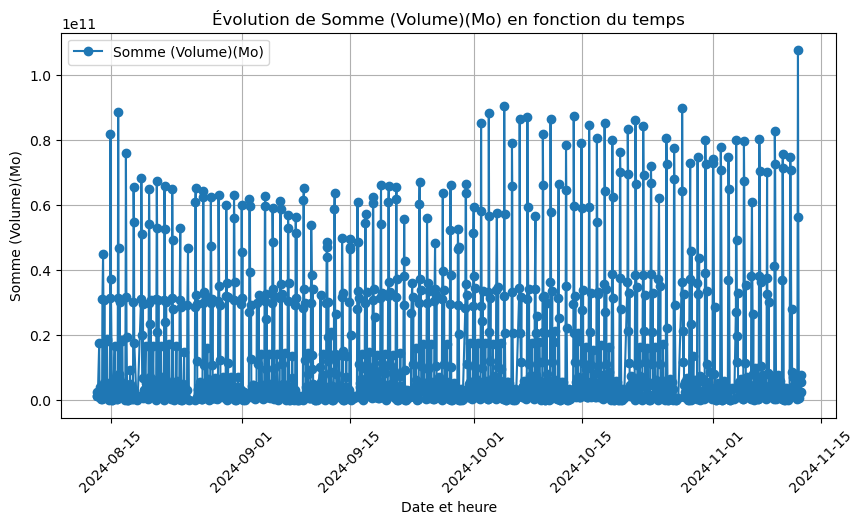

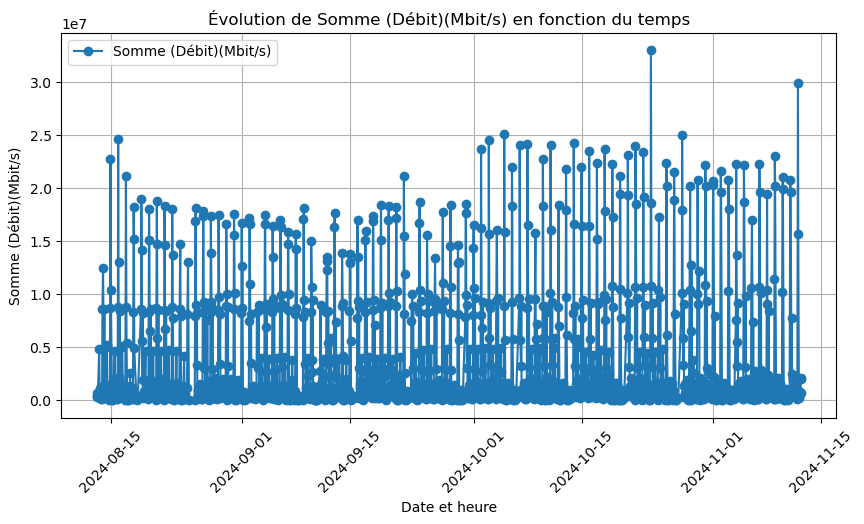

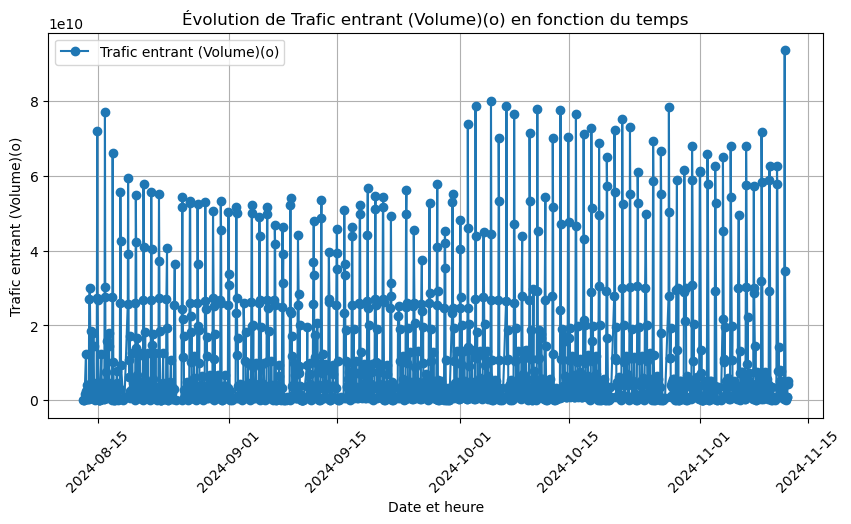

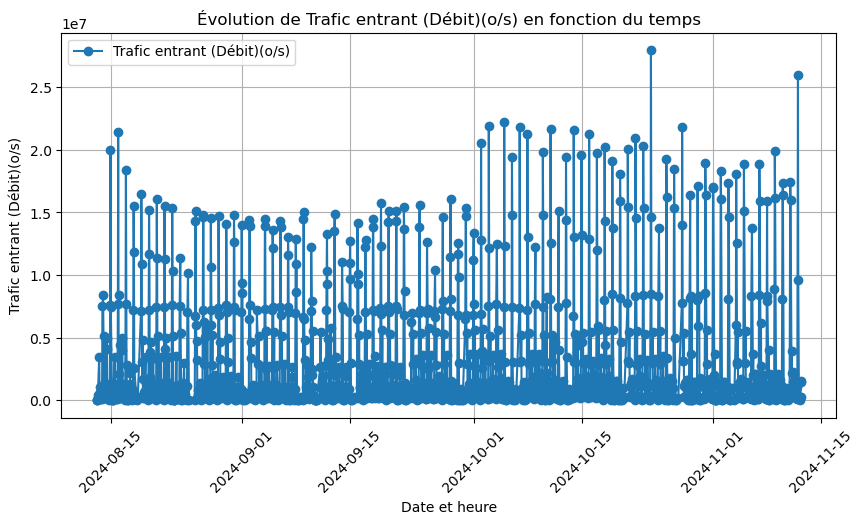

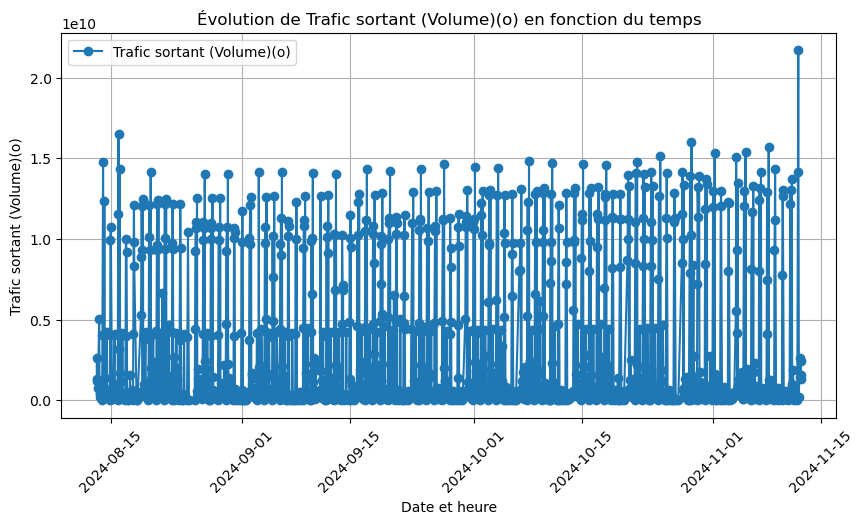

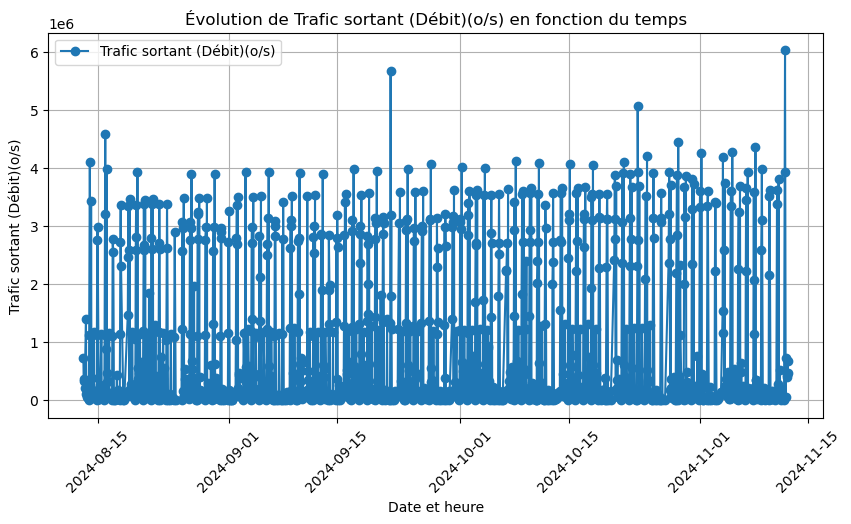

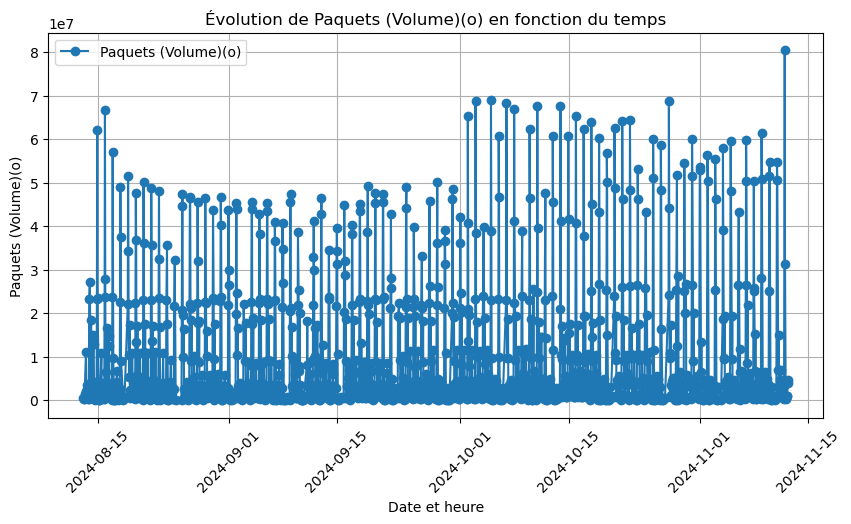

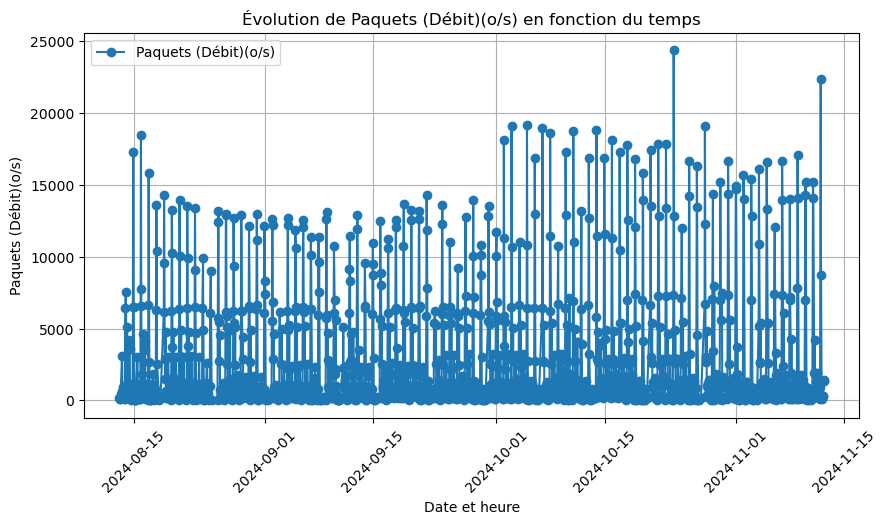

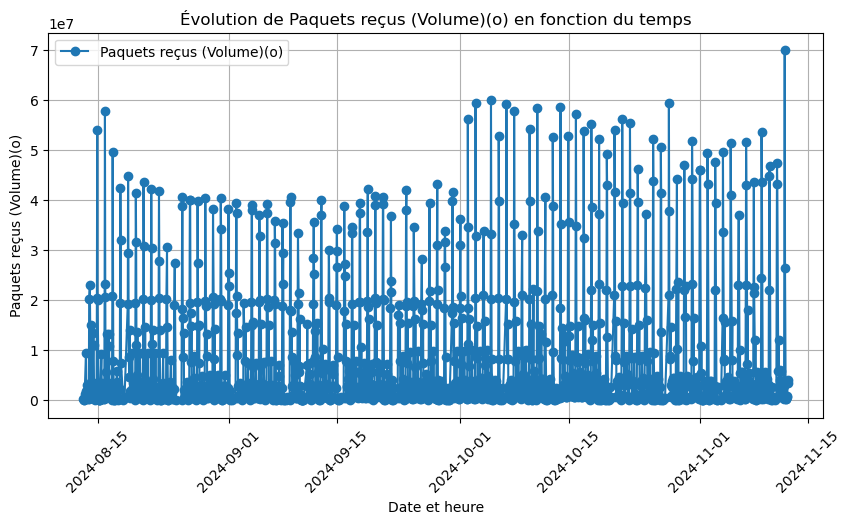

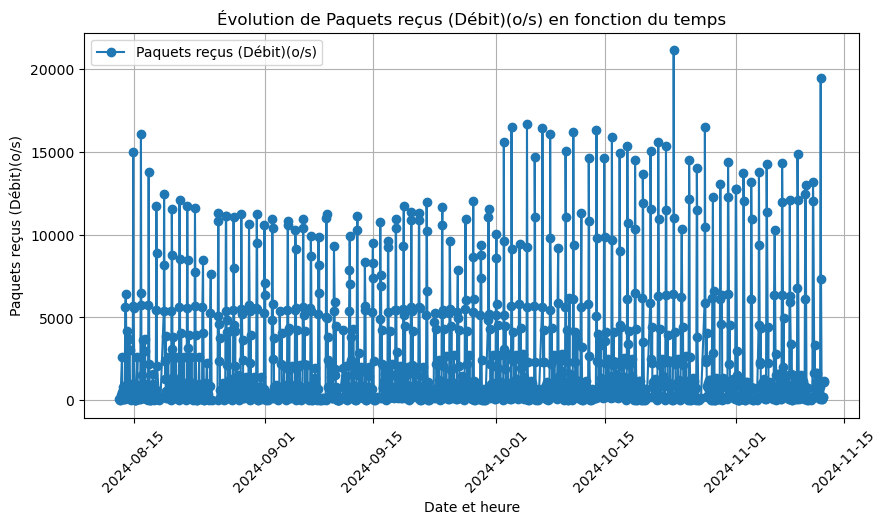

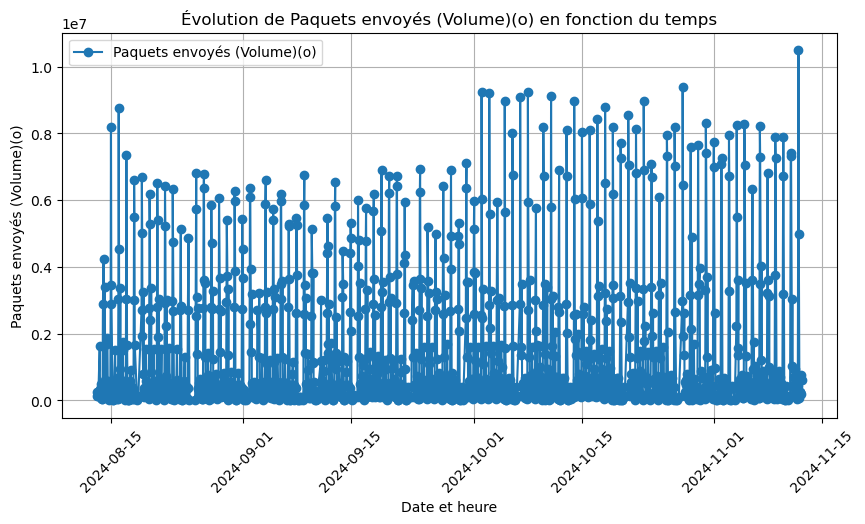

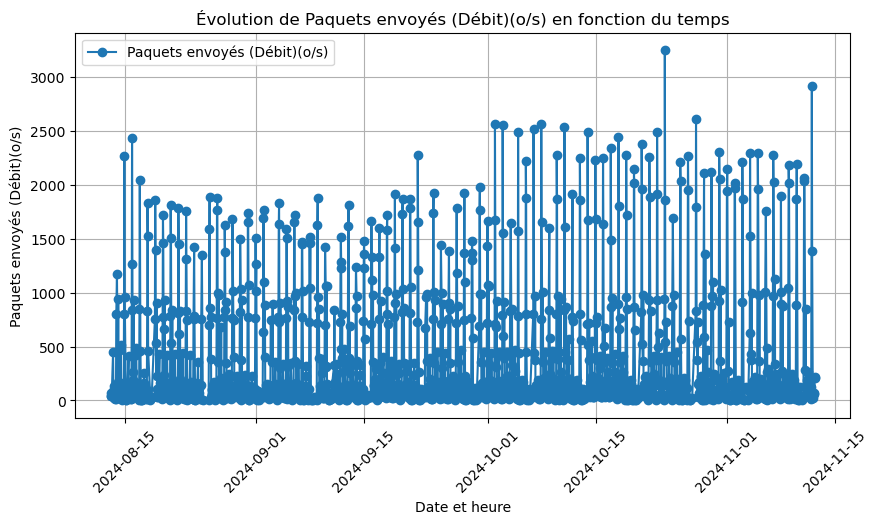

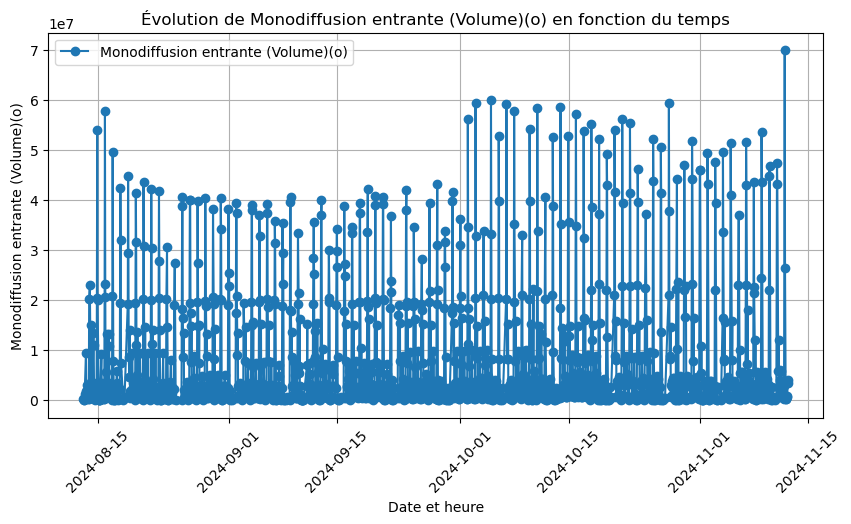

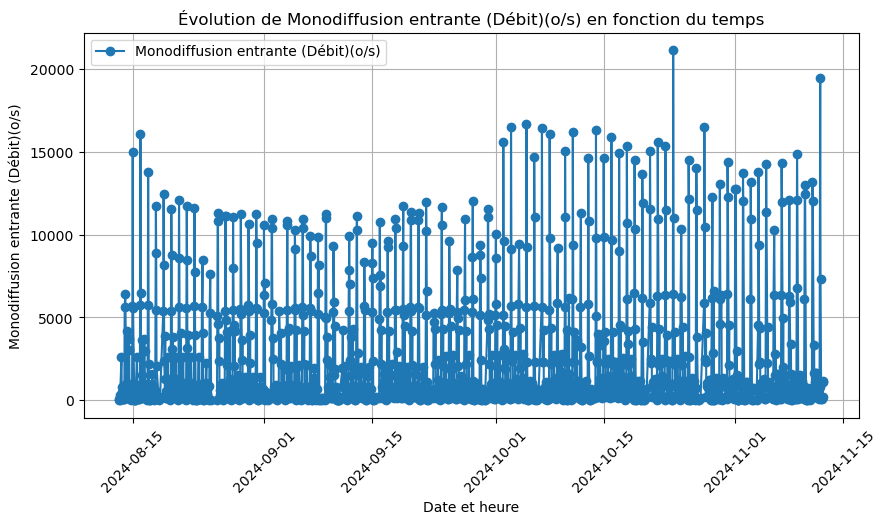

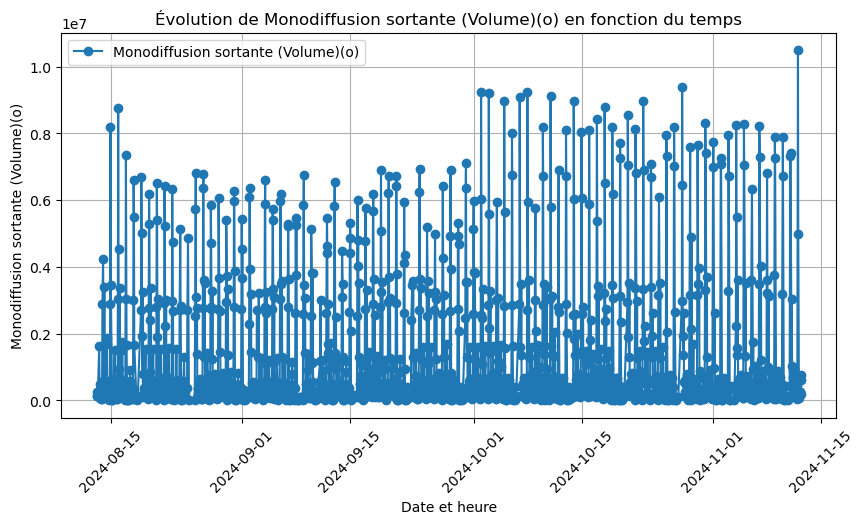

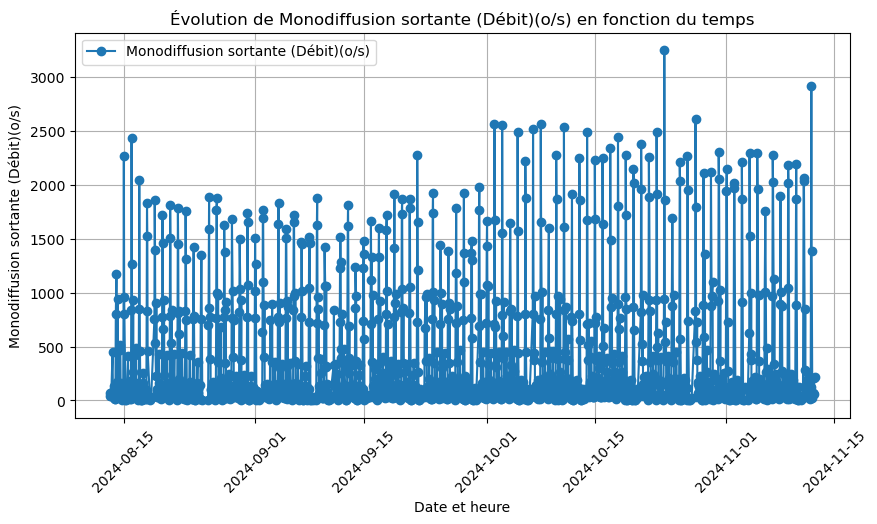

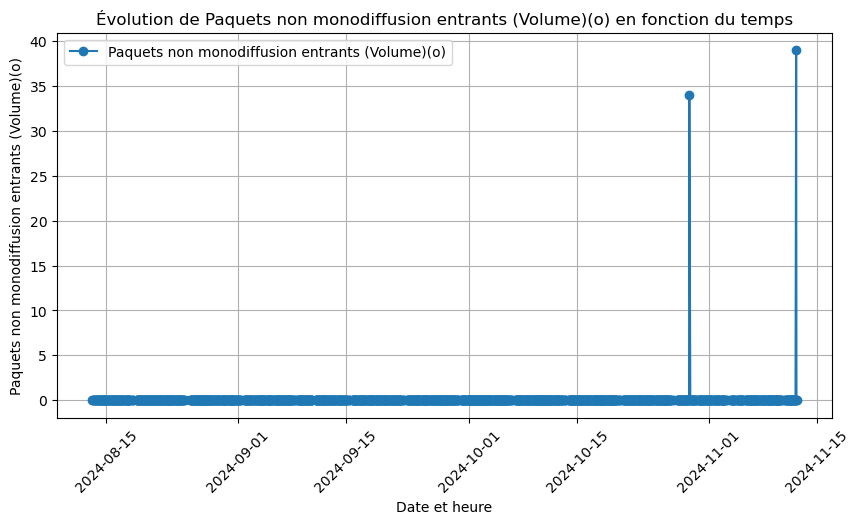

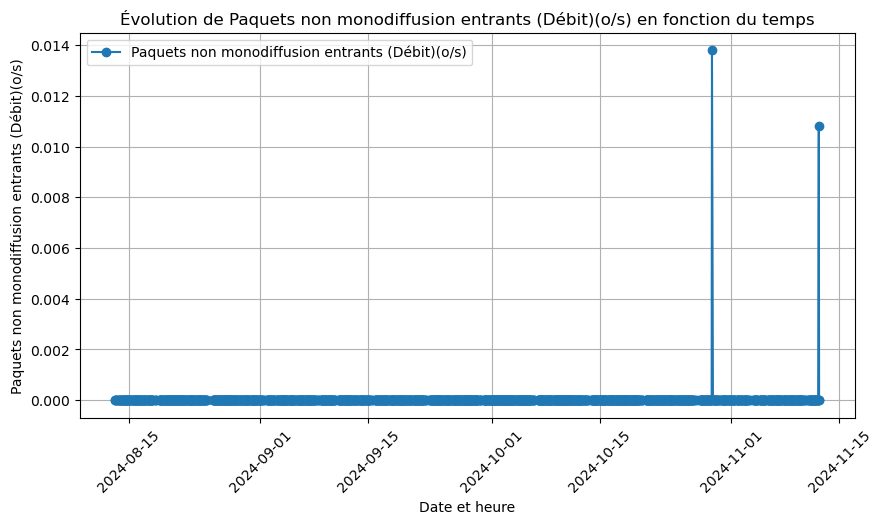

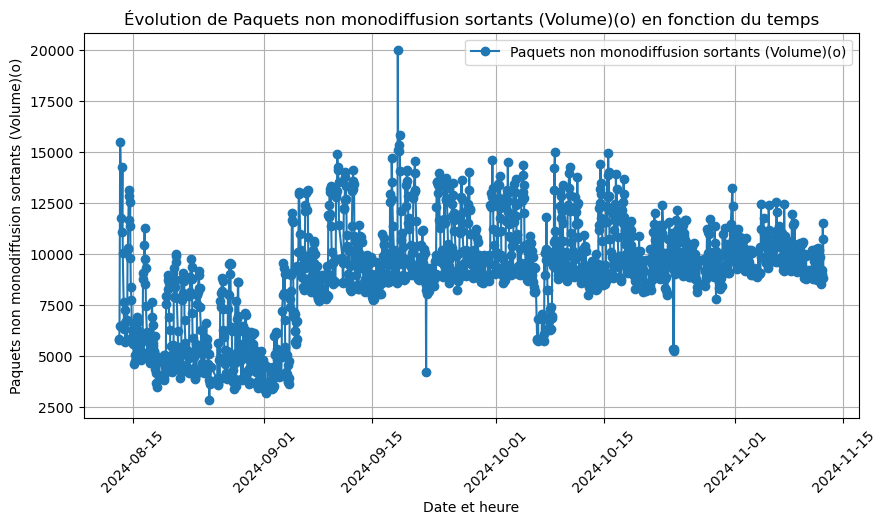

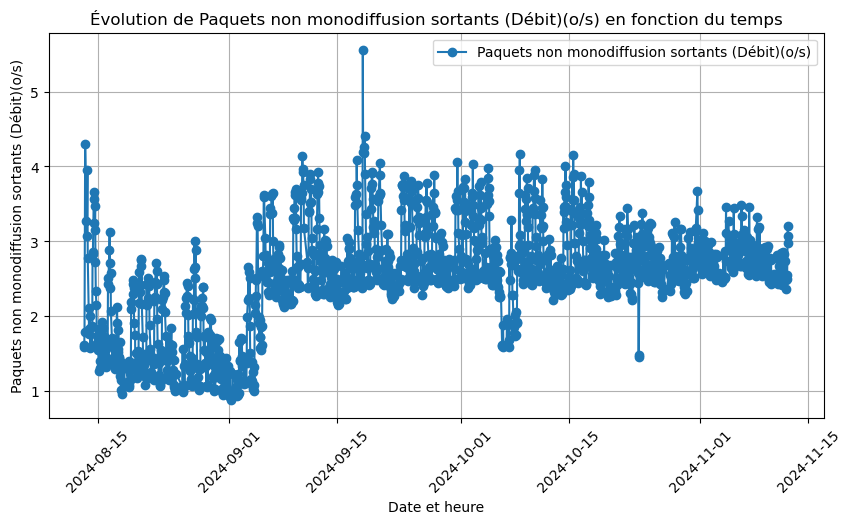

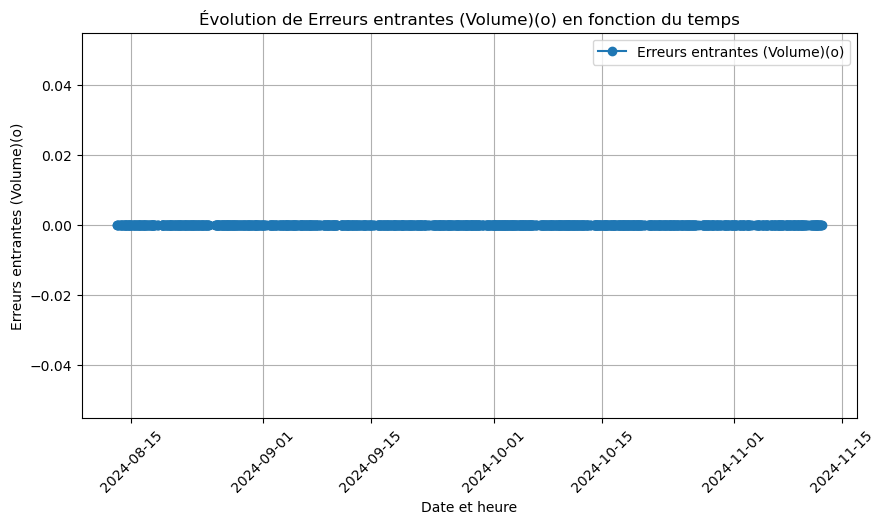

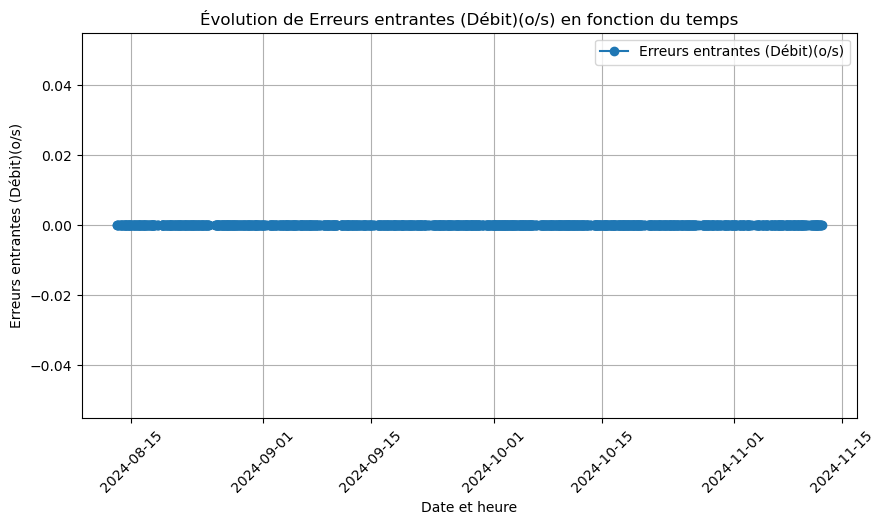

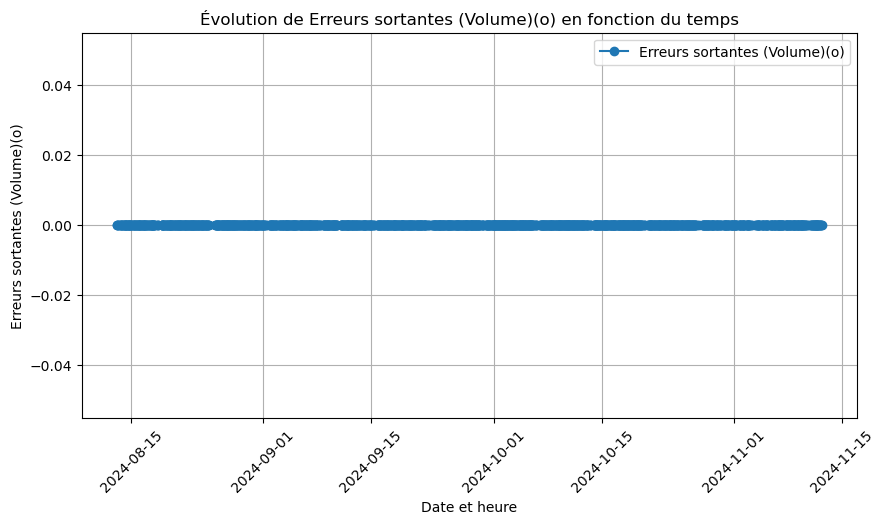

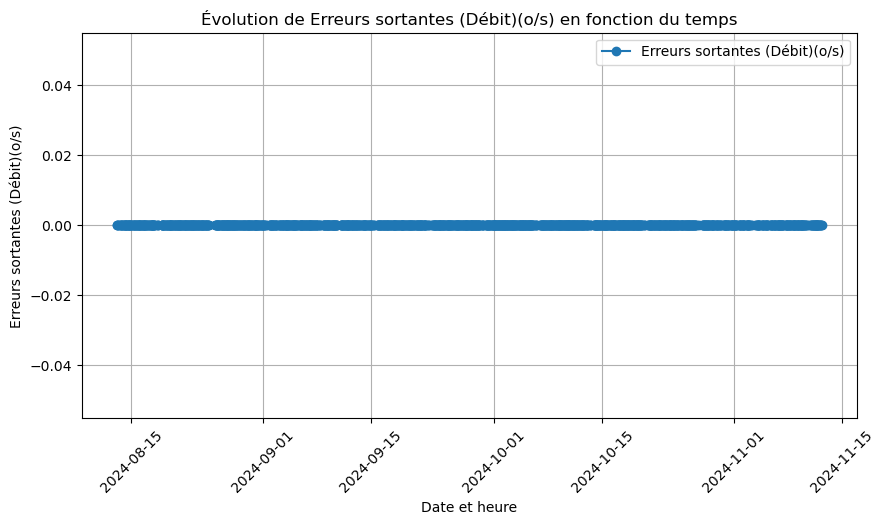

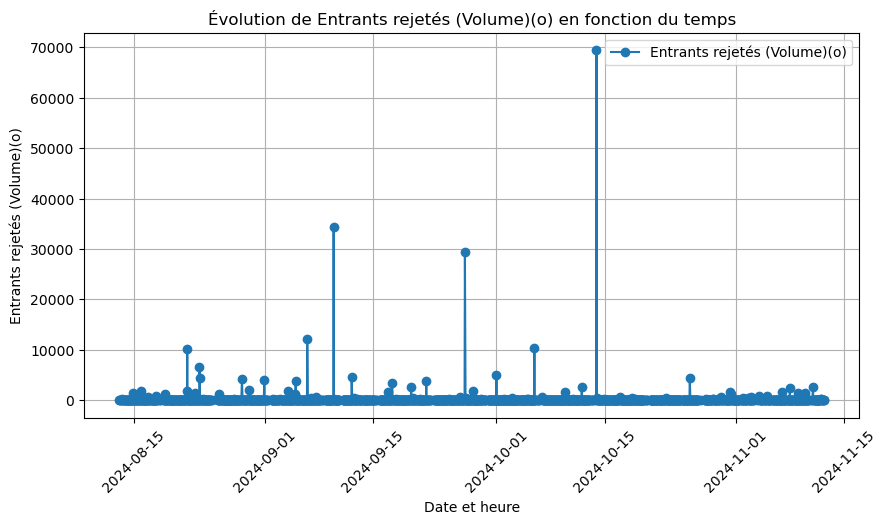

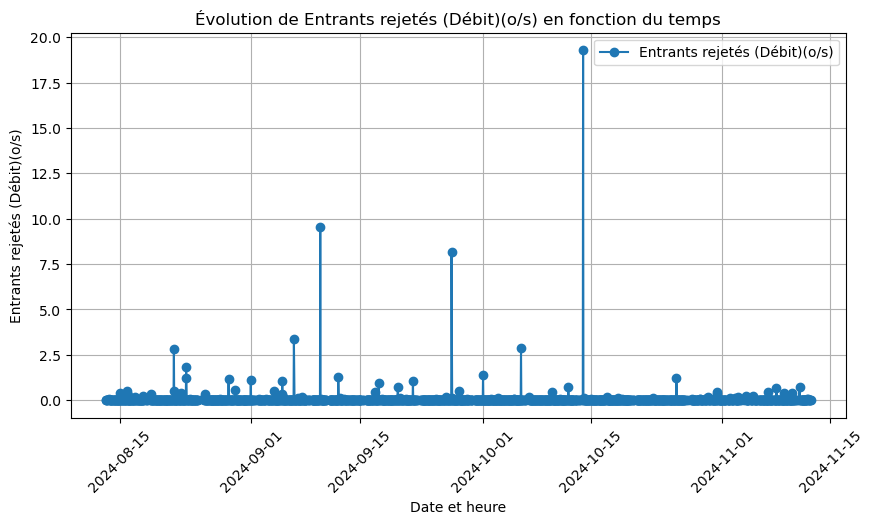

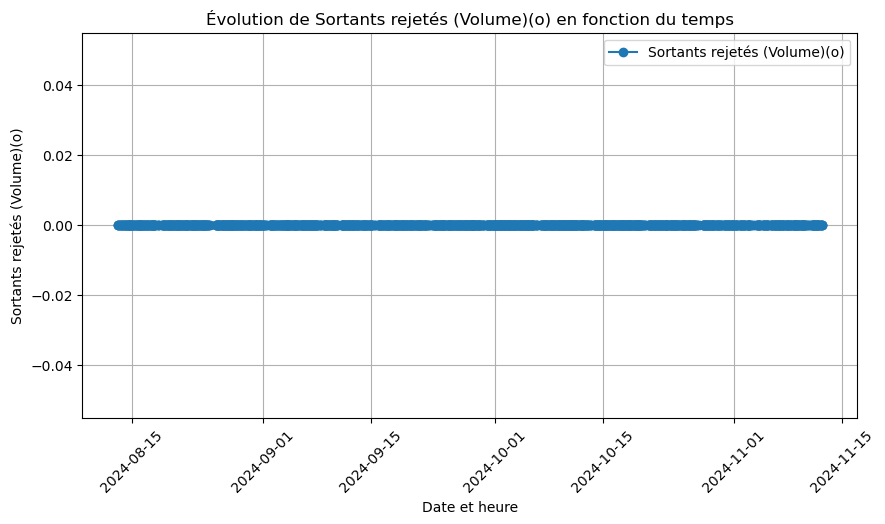

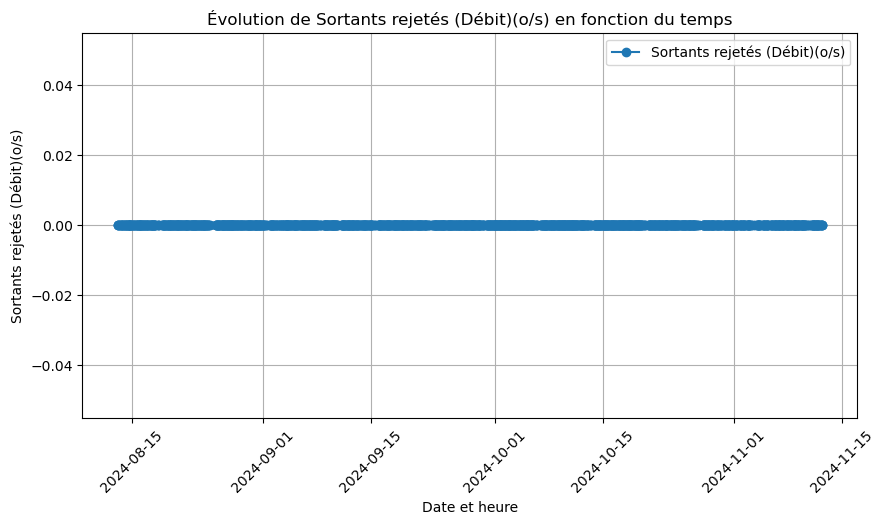

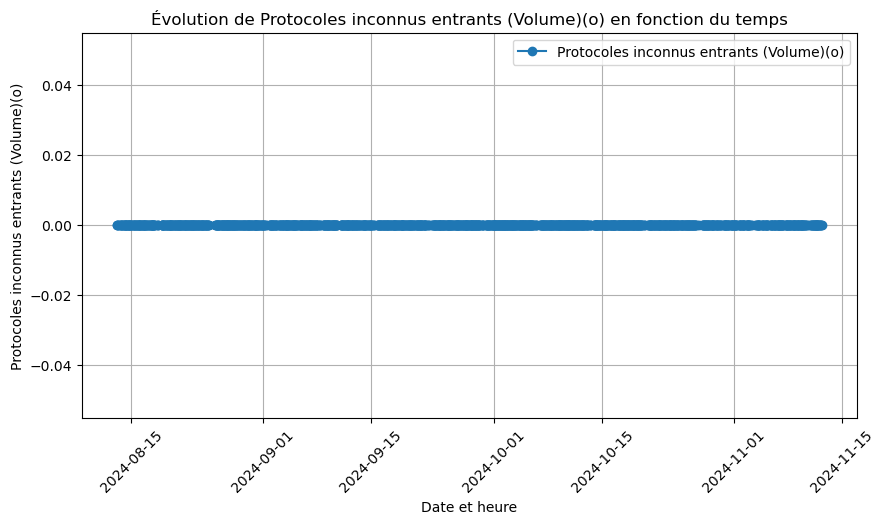

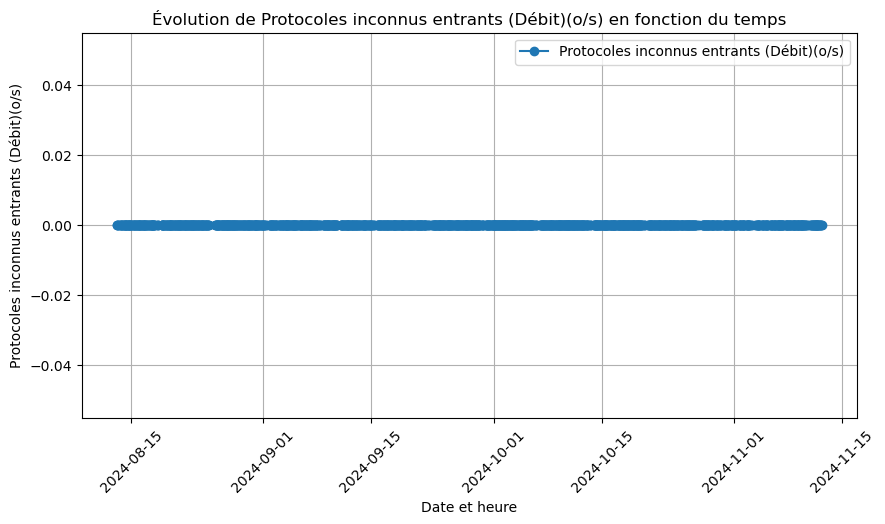

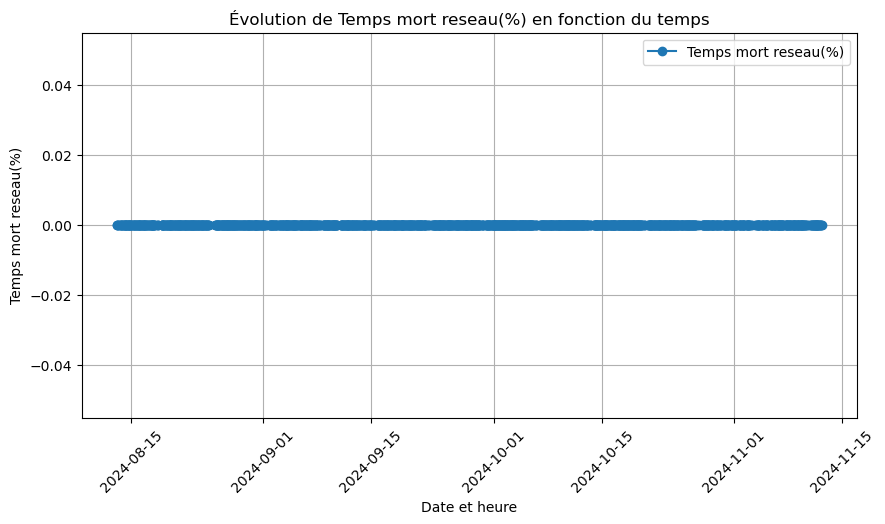

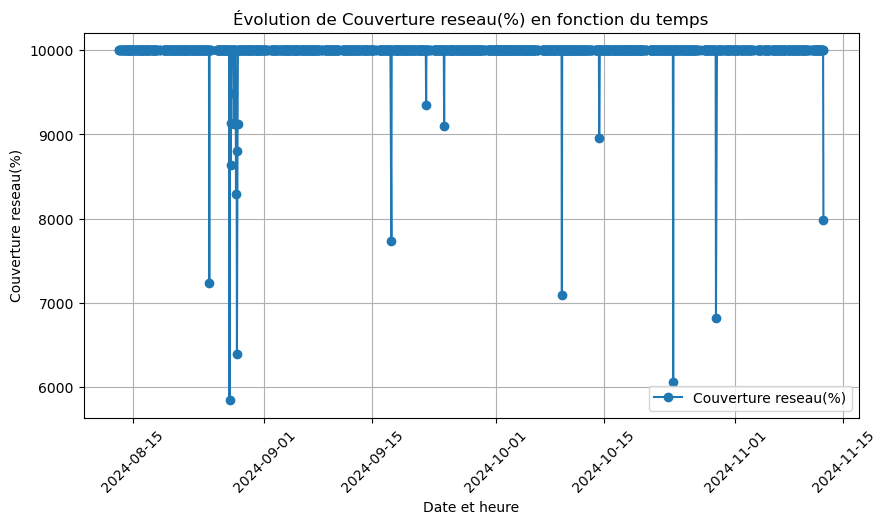

In [31]:
import matplotlib.pyplot as plt
import itertools
import pandas as pd

import matplotlib.pyplot as plt

# Vérifier que 'date_full' est bien au format datetime
tab["date_full"] = pd.to_datetime(tab["date_full"])

# Liste des colonnes à exclure
excluded_cols = ["date_full", "date", "heure", "Date et heure(RAW)"]

# Tracer chaque colonne en fonction du temps
for col in tab.columns:
    if col not in excluded_cols:  # Exclure les colonnes non pertinentes
        plt.figure(figsize=(10, 5))

        plt.plot(tab["date_full"], tab[col], marker='o', linestyle='-')

        plt.xlabel("Date et heure")
        plt.ylabel(f"{col}")  # Correction de la syntaxe
        plt.title(f"Évolution de {col} en fonction du temps")
        plt.legend([col])  # Correction de la légende
        plt.xticks(rotation=45)
        plt.grid()

        plt.show()

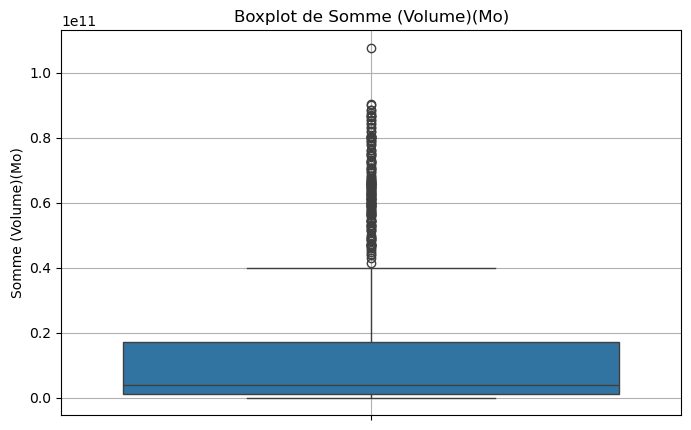

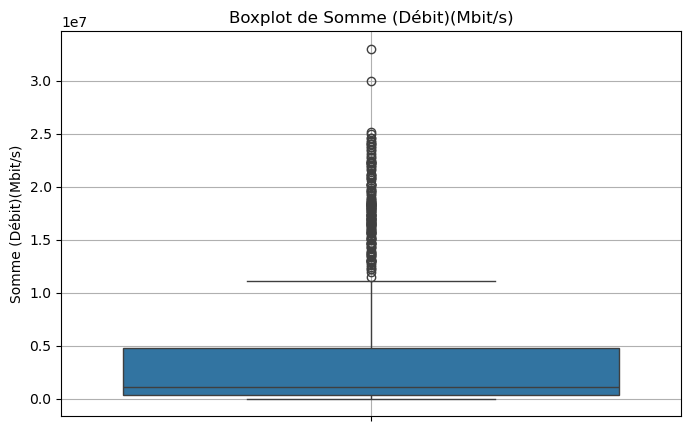

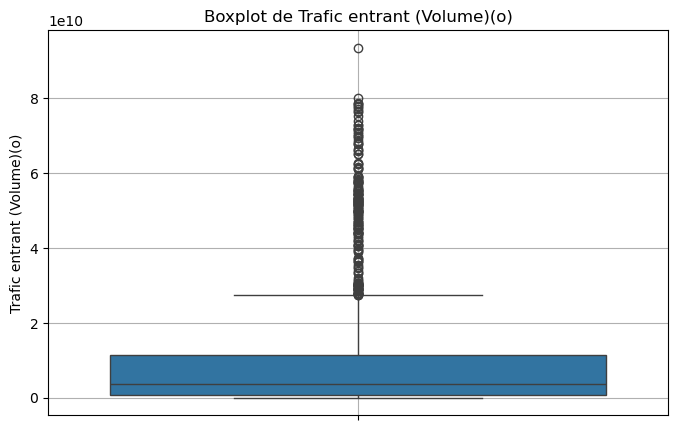

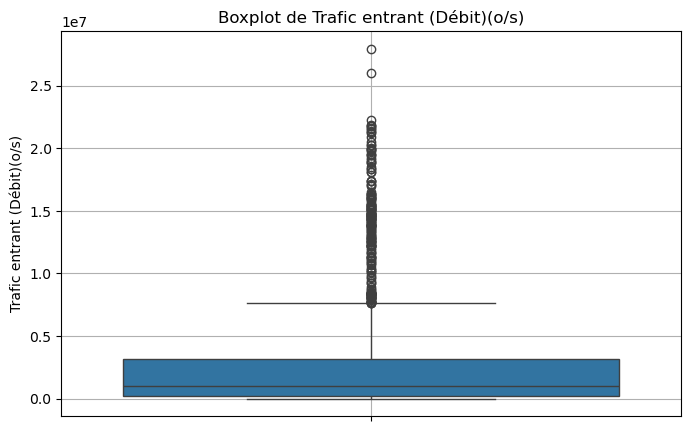

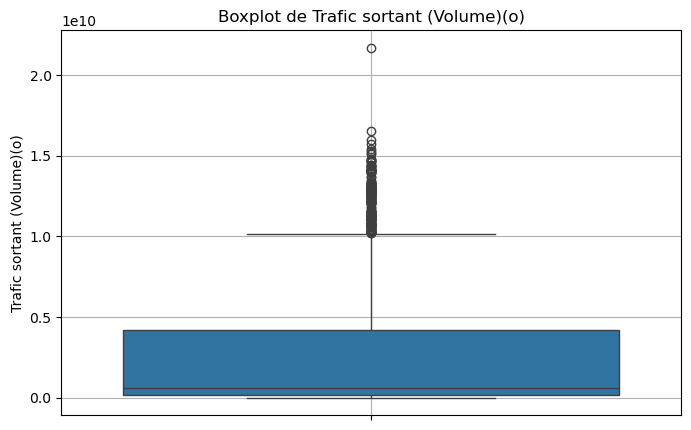

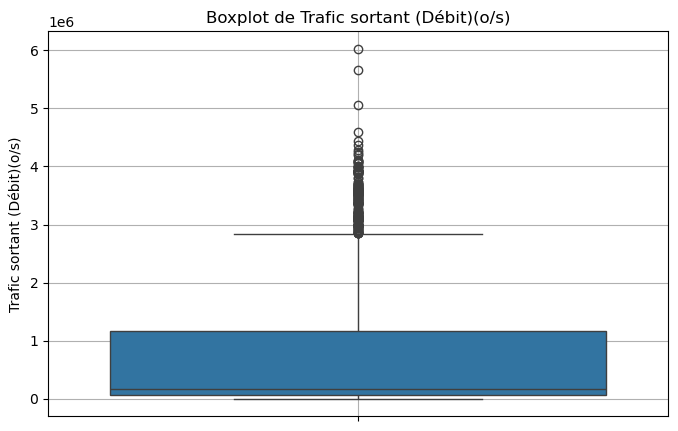

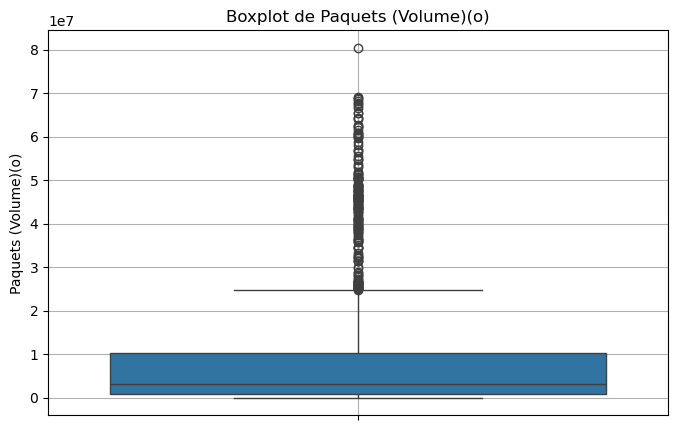

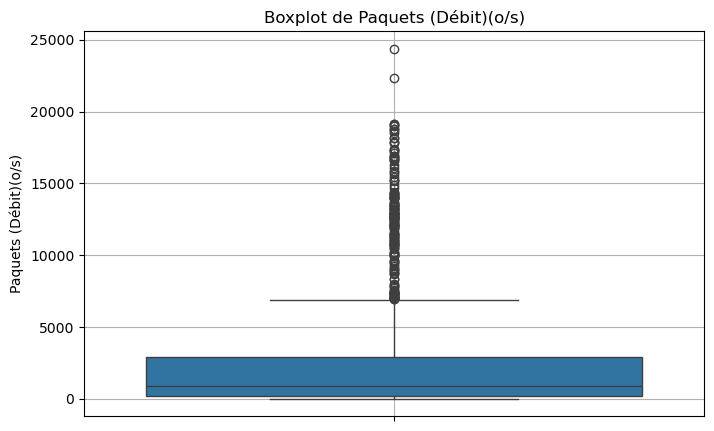

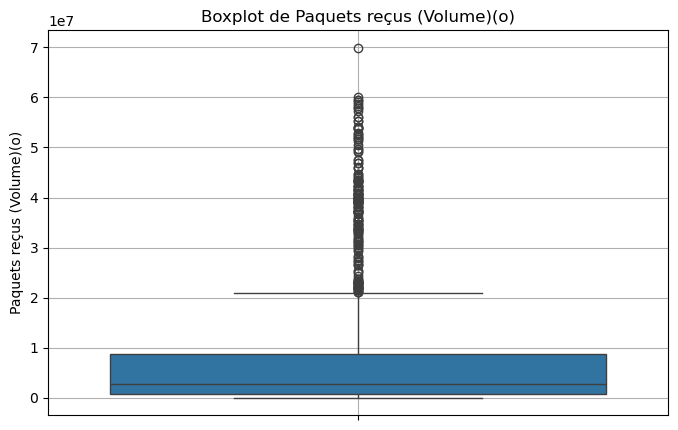

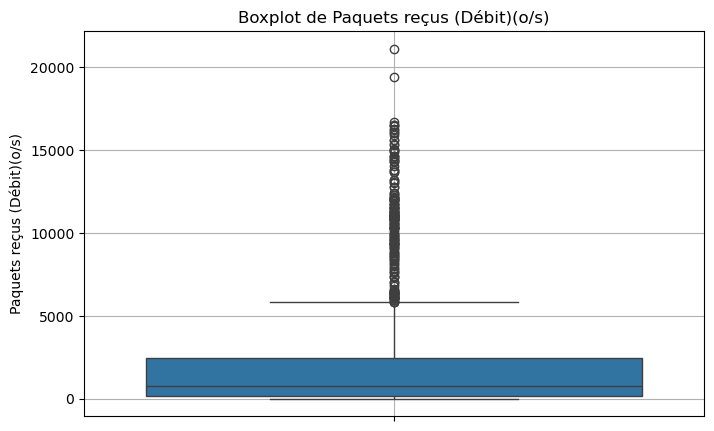

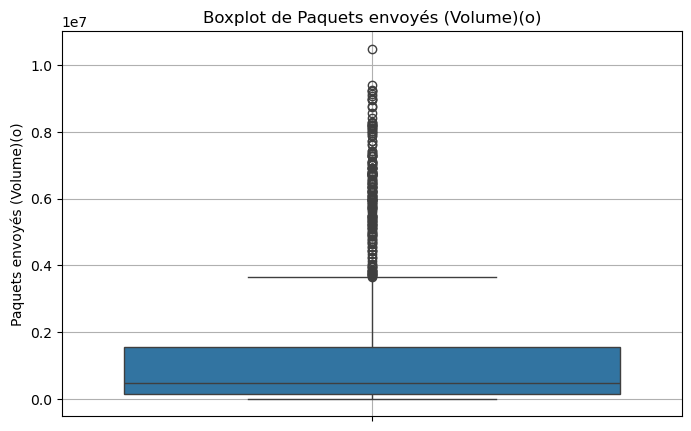

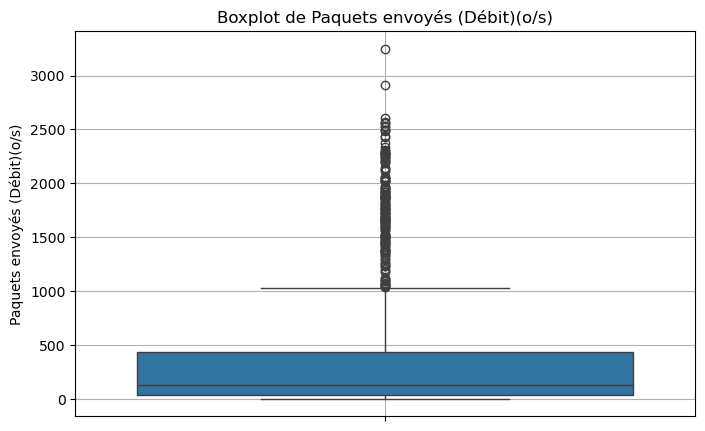

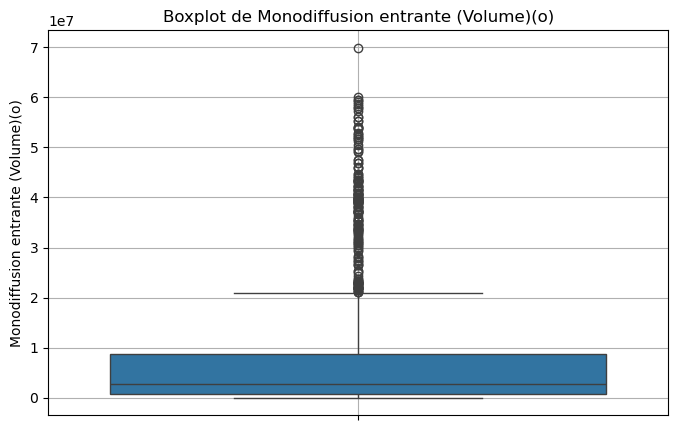

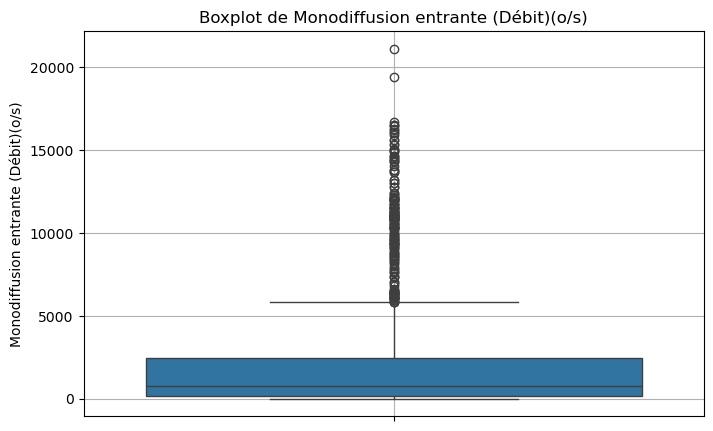

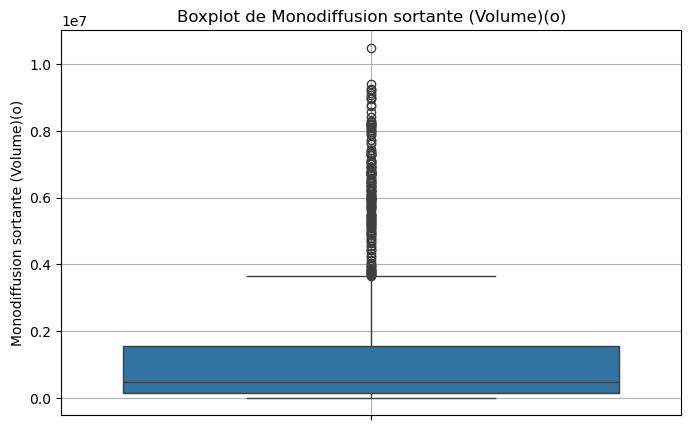

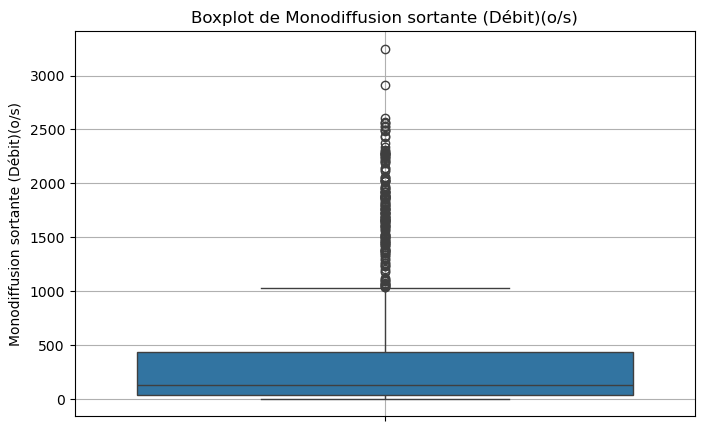

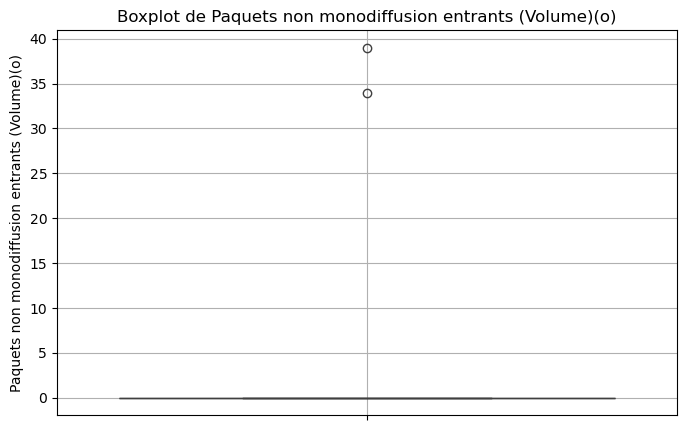

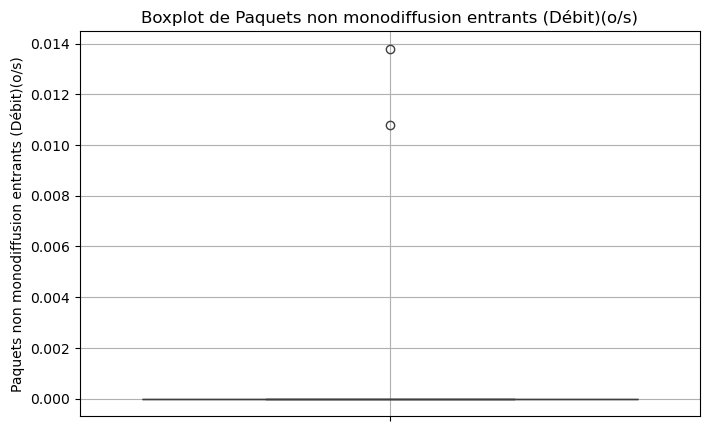

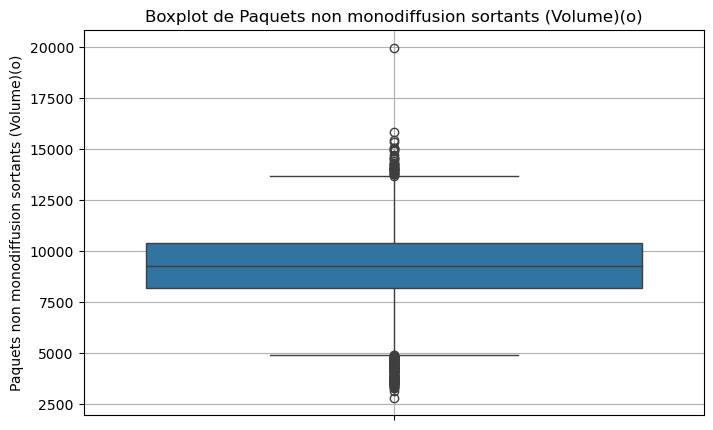

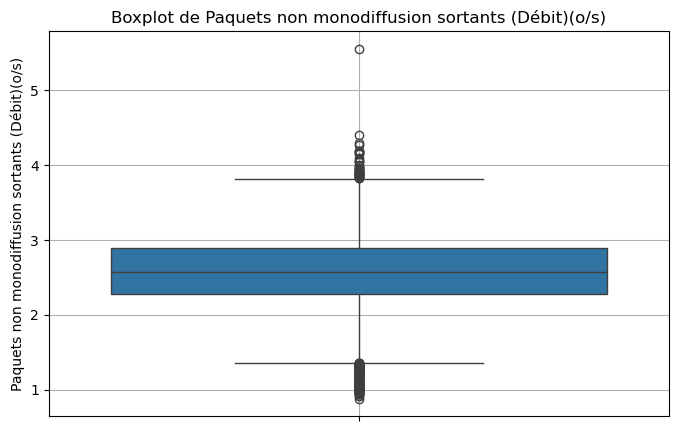

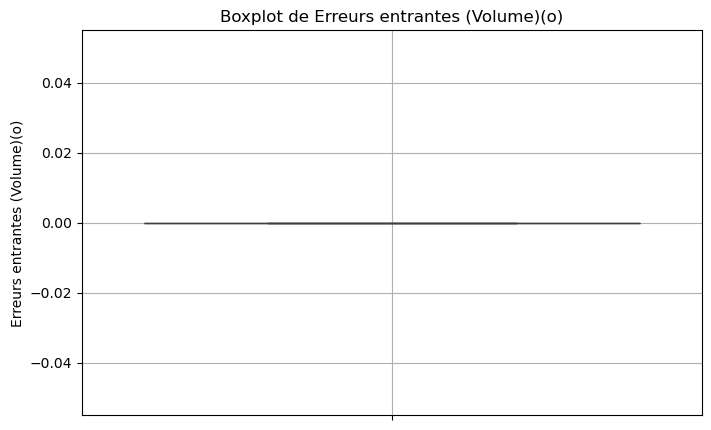

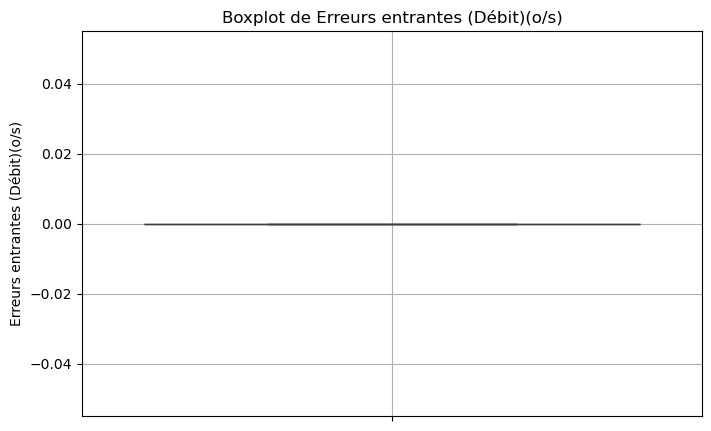

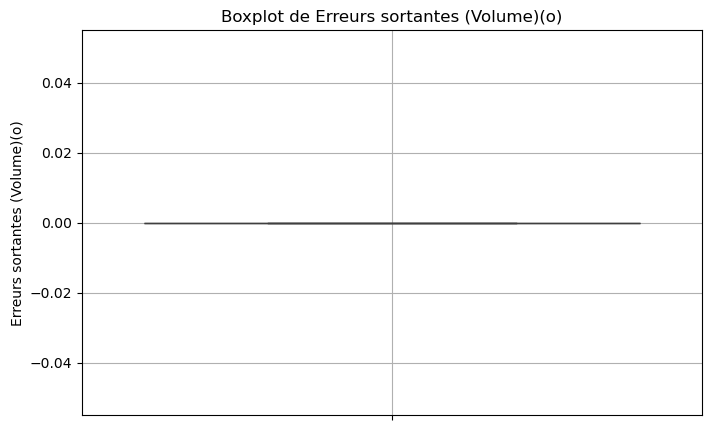

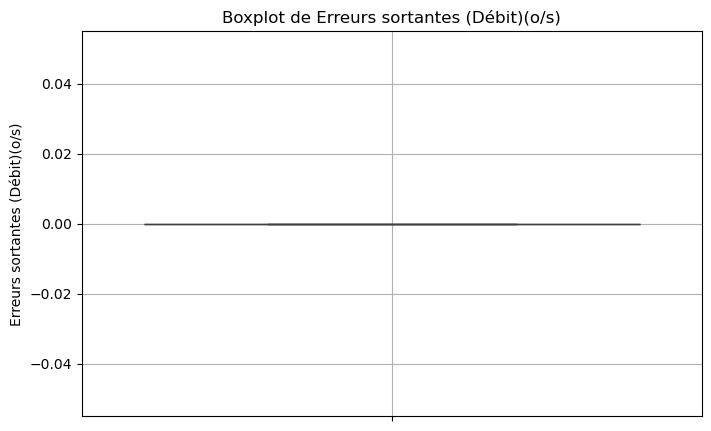

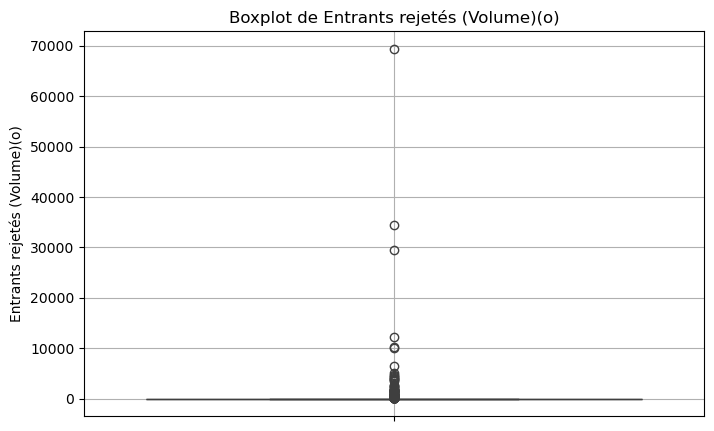

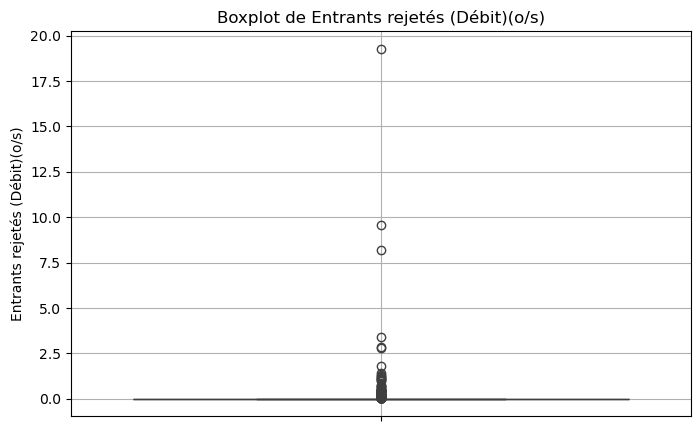

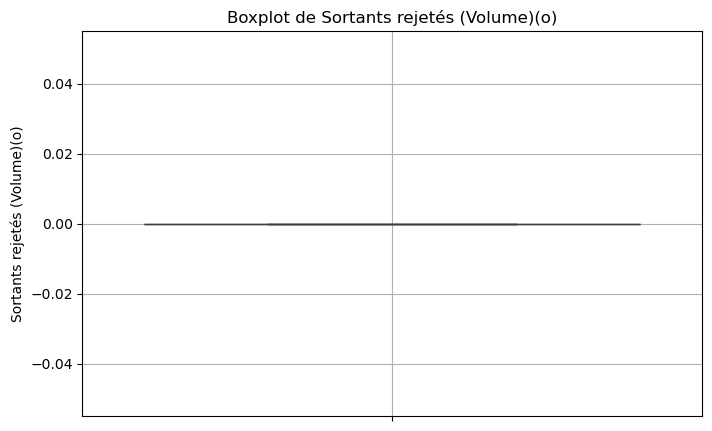

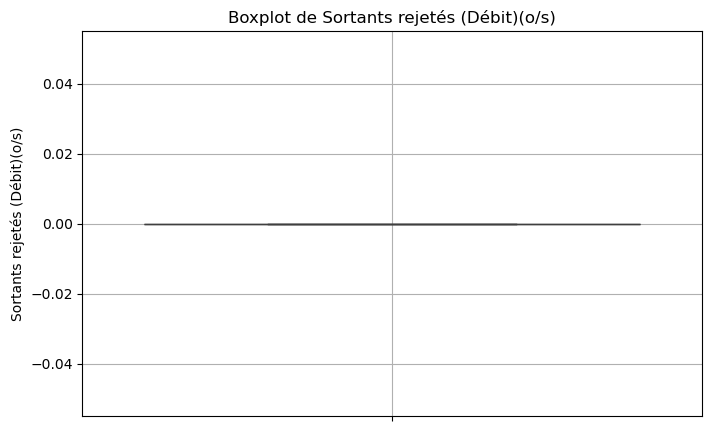

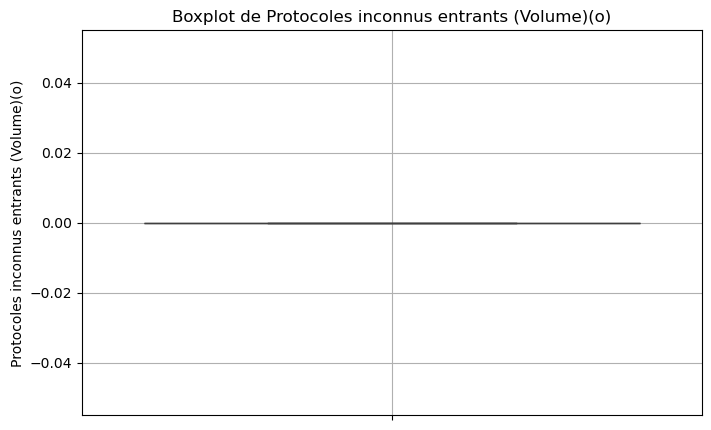

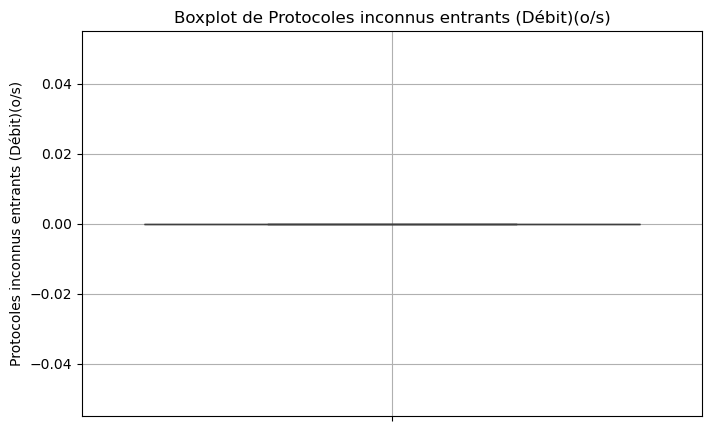

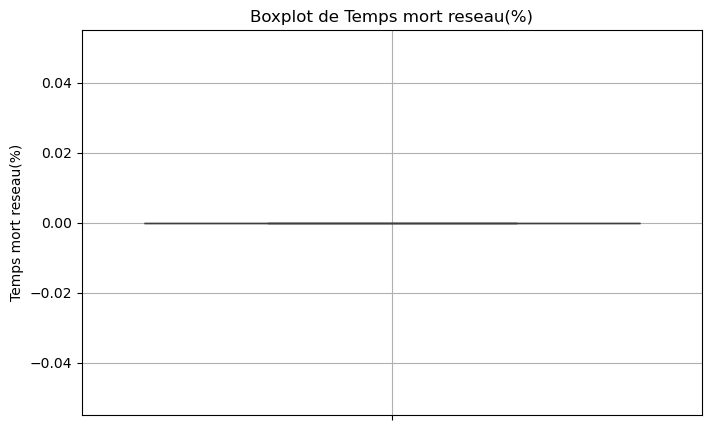

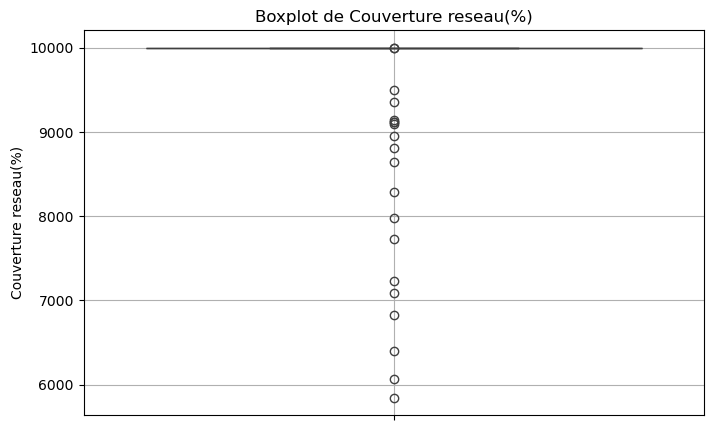

In [32]:
# Exclure les colonnes non numériques
numerical_cols = tab.select_dtypes(include=['number']).columns

# Tracer un boxplot pour chaque colonne
for col in numerical_cols:
    if col not in excluded_cols:  # Exclure les colonnes non pertinentes
        plt.figure(figsize=(8, 5))
        sns.boxplot(y=tab[col])
        plt.title(f"Boxplot de {col}")
        plt.grid()
        plt.show()

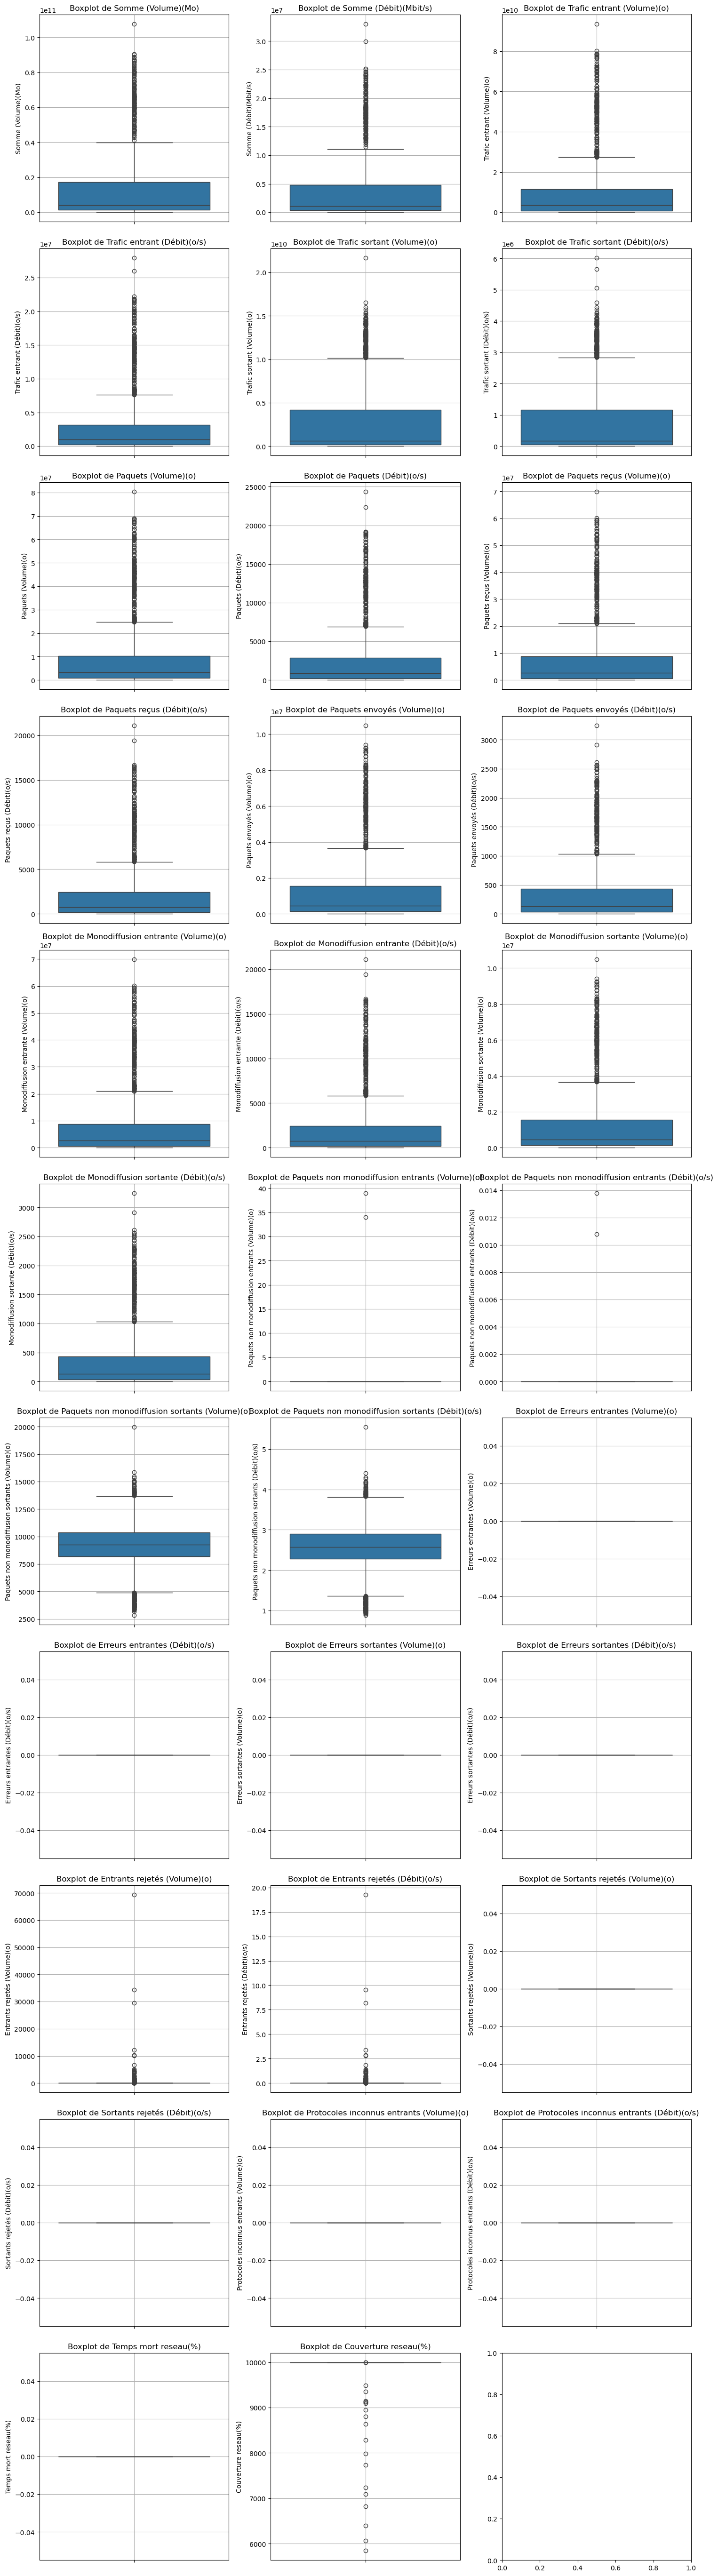

In [33]:
# Sélection des colonnes numériques
numerical_cols = tab.select_dtypes(include=['number']).columns

# Filtre pour exclure les colonnes non pertinentes
cols_to_plot = [col for col in numerical_cols if col not in excluded_cols]

rows=(math.ceil(len(cols_to_plot)/3))
# Créer une figure avec 2 lignes et 3 colonnes de sous-graphiques (axes)
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, rows*5))

# Convertir "axes" en un tableau 1D pour plus de flexibilité
axes = axes.flatten()

# Boucler sur les colonnes et tracer un boxplot dans chaque sous-graphique
for i, col in enumerate(cols_to_plot):
    sns.boxplot(y=tab[col], ax=axes[i])
    axes[i].set_title(f"Boxplot de {col}")
    axes[i].grid()

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

### drop des colonnes inutiles

In [35]:
tab = tab.drop(columns=["Erreurs entrantes (Volume)(o)"])
tab = tab.drop(columns=["Erreurs entrantes (Débit)(o/s)"])

tab = tab.drop(columns=["Erreurs sortantes (Volume)(o)"])
tab = tab.drop(columns=["Erreurs sortantes (Débit)(o/s)"])

tab = tab.drop(columns=["Sortants rejetés (Volume)(o)"])
tab = tab.drop(columns=["Sortants rejetés (Débit)(o/s)"])

tab = tab.drop(columns=["Protocoles inconnus entrants (Volume)(o)"])
tab = tab.drop(columns=["Protocoles inconnus entrants (Débit)(o/s)"])

tab = tab.drop(columns=["Temps mort reseau(%)"])

### Enregistrement du nouveau dataframe dans un nouveau csv

In [37]:
#### ATTENTION au path et nom de fichier
tab.to_csv("../data/logServer/filtered/myreprot_reseau_filtered.csv", index=False, encoding='utf-8')